# Задание

Задание можно посмотреть сдесь https://github.com/obulygin/pyda_homeworks/blob/master/visualization/visualization.ipynb

Для анализа возьмем датасет https://www.kaggle.com/datasets/lava18/google-play-store-apps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Home\MyGithub\pyda_42\Module3\googleplaystore\googleplaystore.csv', usecols=['Category','Rating','Reviews','Size','Installs', 'Content Rating'])

data = data[data.Rating.notna()]
data = data[data['Content Rating'].notna()]

data.Reviews = data.Reviews.astype('int64')

data.Installs = data.Installs.replace(to_replace=r'[+|,]', value='', regex=True)
data.Installs = data.Installs.astype('int64')

def size_convert(size):
    '''
    Переводим размер в килобайты и убираем единицы измерения
    '''
    if size[-1] == 'k':
        return float(size[:-1])
    elif size[-1] == 'M':
        return float(size[:-1]) * 1000
    else:
        return None

data.Size = data.Size.apply(size_convert)
data.Size = data.Size.astype('float64')
data = data[data.Size.notna()]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7729 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        7729 non-null   object 
 1   Rating          7729 non-null   float64
 2   Reviews         7729 non-null   int64  
 3   Size            7729 non-null   float64
 4   Installs        7729 non-null   int64  
 5   Content Rating  7729 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 422.7+ KB


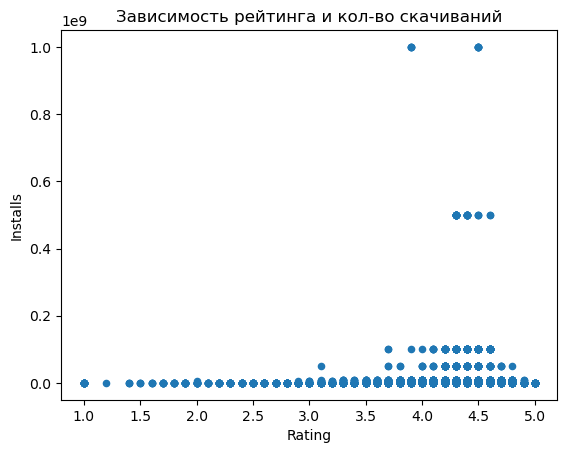

In [2]:
# зависимость рейтинга и кол-ва скачиваний (точечный график)
data.plot(kind='scatter', 
        x='Rating', 
        y='Installs', 
        title='Зависимость рейтинга и кол-во скачиваний')
plt.show()

# Вывод: прослеживается слабая связь. Много скачиванийт только у приложений с большим рейтингом, 
# но мало скачиваний у приложений c разными рейтингами

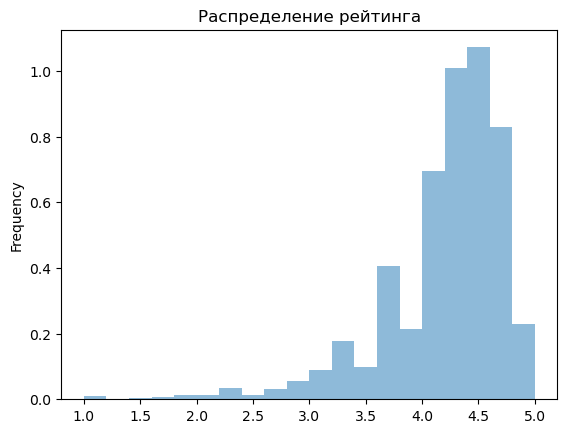

In [9]:
# Гистограмма рейтинга
data.Rating.plot(kind='hist', 
                     alpha = 0.5,
                     bins=20,
                     density = True,
                     title='Распределение рейтинга')
plt.show()

# Вывод: чаще приложения оценивают хорошо (от 4). Ужастно почти не оченивают. 

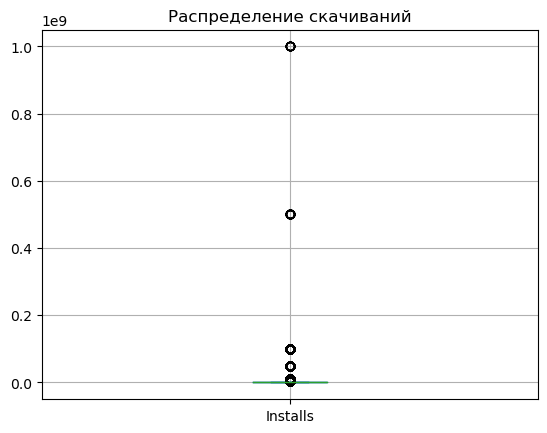

In [4]:
# Распределение установок 

data.Installs.plot(kind='box',
                   title='Распределение скачиваний', grid=True)

plt.show()

# Вывод: выбросы очень далеко и картина не информативна. Удалим выбросы и посмотрим еще раз

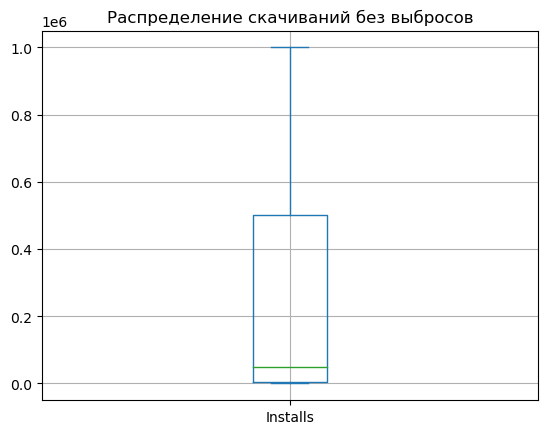

In [5]:
iqr = data.Installs.quantile(0.75) - data.Installs.quantile(0.25)
lower_bound = round(data.Installs.quantile(0.25) - (1.5 * iqr), 2)
upper_bound = round(data.Installs.quantile(0.75) + (1.5 * iqr), 2)

data[(lower_bound < data.Installs) & (data.Installs < upper_bound)].Installs.plot(kind='box',
                   title='Распределение скачиваний без выбросов', grid=True)

plt.show()

# Вывод: не многие приложения скачивают много. В основном большинство прилодений скачивают не много, относительно флагманов.

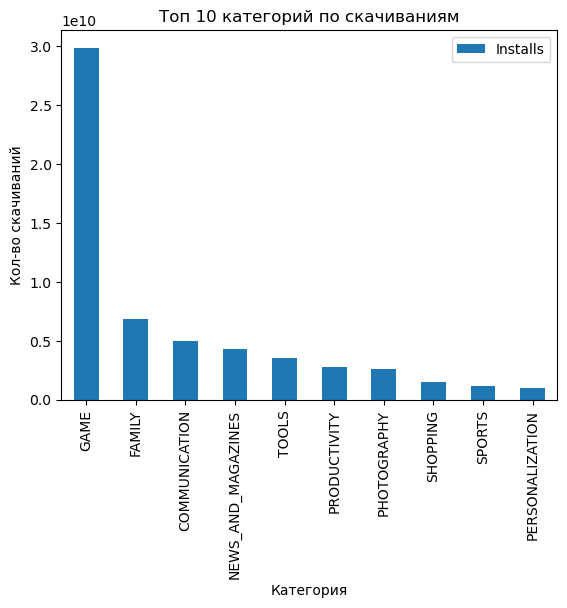

In [6]:
# топ 10 категорий по скачиваниям

data[['Installs', 'Category']].groupby('Category').sum().sort_values('Installs', ascending=False).head(10).plot(kind='bar', 
                                                                  title='Топ 10 категорий по скачиваниям',
                                                                  xlabel='Категория',
                                                                  ylabel='Кол-во скачиваний')
plt.show()

# Вывод: Игры скачиваю манного больше, чем все остальные категории. В других категориях такий сильной разницы нет.

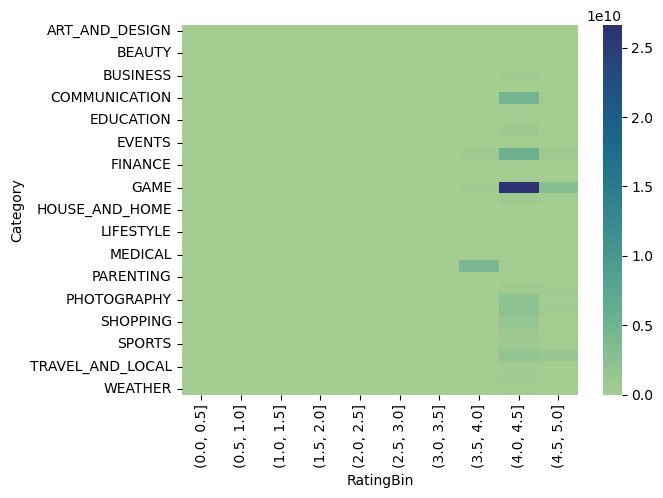

In [16]:
# Тепловая по рейтинг + катенгория - кол-во скачиваний
import seaborn as sns

data['RatingBin'] = pd.cut(data.Rating,
                        bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

pivot = data.pivot_table(
                        index='Category', 
                        columns='RatingBin', 
                        values='Installs', 
                        aggfunc=sum)

sns.heatmap(pivot, cmap='crest')
plt.show()

# Вывод: Чаще всего скачевают игры с рейтингом 4-4.5. И все категории чаще скачивают с рейтингом 4-4.5.

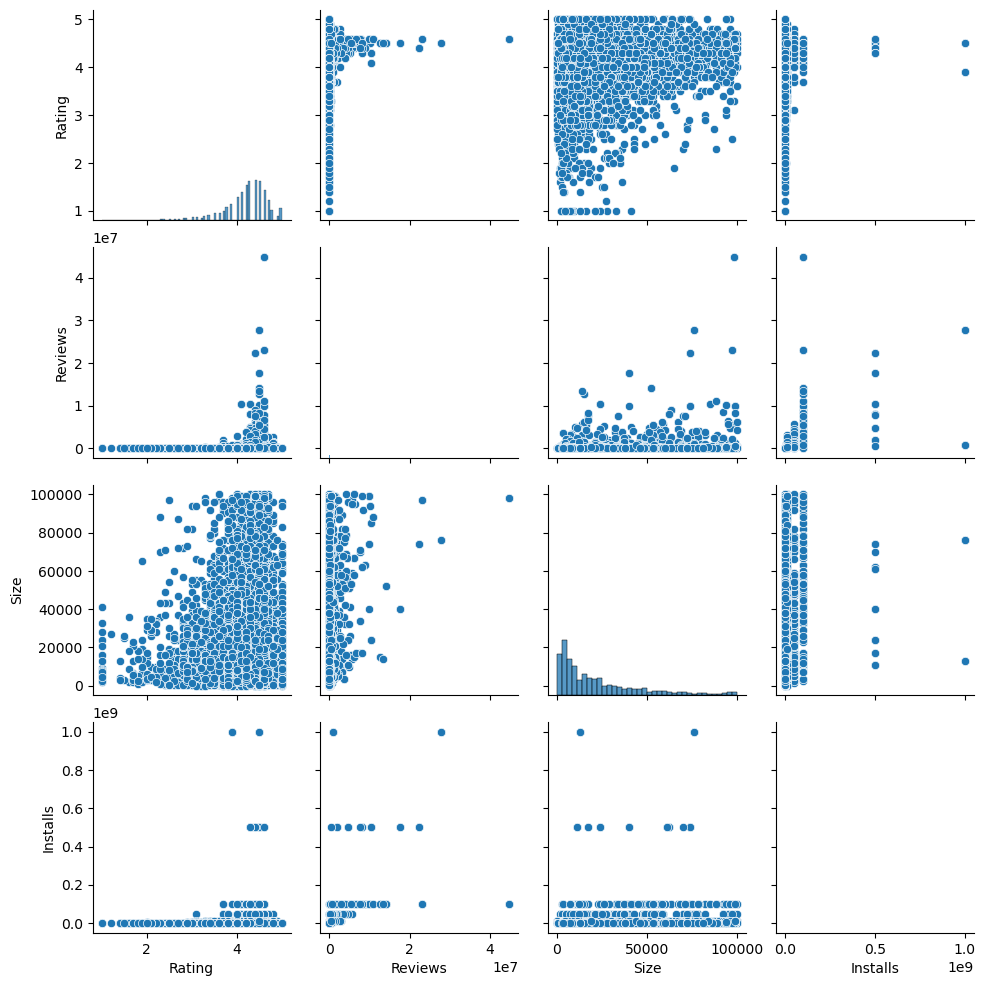

In [8]:
# scatter plot matrix - рейтинг, кол-во скачиваний, размер приложения, кол-во оценок

sns.pairplot(data)

plt.show()

# Выводы: 
# Приложений с небольшим размером больше, чем больших. Но снижение приложений с ростом размера идет равномерно.
# Межно оценкой и размером нет связи, так же как между. В целом размер кажется почти не связан с остальными метриками. 

# Между количеством оценок и рейтингом есть слабая связь - сильно больше оценок у приложений с рейтингом около 4.5,
# а но мало оценок есть у приложений с разными рейтингами 
# прослеживается слабая связь рейтинга и скачиваний. Много скачиванийт только у приложений с большим рейтингом, 
# но мало скачиваний у приложений c разными рейтингами